Cross-Validation R^2 Scores: [1. 1. 1. 1. 1.]
Mean R^2 Score: 1.0
Cross-Validation Adjusted R^2 Scores: [1. 1. 1. 1. 1.]
Mean Adjusted R^2 Score: 1.0
Cross-Validation RMSE Scores: [8.70383371e-13 8.78335660e-13 8.95764837e-13 8.94245048e-13
 8.81437298e-13]
Mean RMSE Score: 8.840332428116105e-13


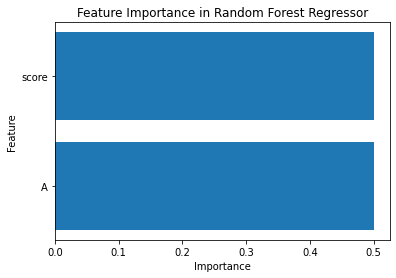

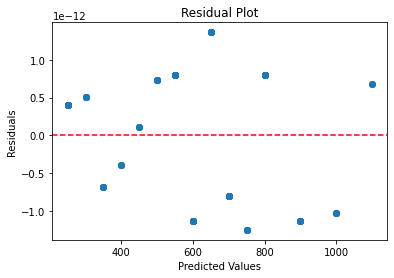

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
import matplotlib.pyplot as plt



# Load the data
dataset = pd.read_csv('tenegrad_rf.csv')
# Sample dataset (replace with your actual data)
# X should be your features (e.g., focus, aperture, Tenegrad score)
# y should be your target variable (e.g., predicted distance)
# X = ...
# y = ...
# Split the data into train and test sets
X = dataset.drop(columns=['A', 'focus', 'score'])
y = dataset['Pred_dist']

# Split the data into training and testing sets (if not already split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation using R^2 as the scoring metric
cv_r2_scores = cross_val_score(rf_regressor, X, y, cv=kf, scoring='r2')

# Print the R^2 scores for each fold
print(f"Cross-Validation R^2 Scores: {cv_r2_scores}")
print(f"Mean R^2 Score: {cv_r2_scores.mean()}")

# Calculate Adjusted R^2 manually for each fold
adjusted_r2_scores = []

for train_index, test_index in kf.split(X):
    # Use .iloc to index by row position
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]  
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index] 
    
    # Train the model on the fold
    rf_regressor.fit(X_train_fold, y_train_fold)
    
    # Predict on the fold's test set
    y_pred_fold = rf_regressor.predict(X_test_fold)
    
    # Calculate R^2 for the fold
    r2_fold = r2_score(y_test_fold, y_pred_fold)
    
    # Calculate Adjusted R^2 for the fold
    n = len(y_test_fold)
    k = X_test_fold.shape[1]
    adjusted_r2_fold = 1 - ((1 - r2_fold) * (n - 1) / (n - k - 1))
    adjusted_r2_scores.append(adjusted_r2_fold)

# Convert to numpy array for easier analysis
adjusted_r2_scores = np.array(adjusted_r2_scores)

# Print Adjusted R^2 scores
print(f"Cross-Validation Adjusted R^2 Scores: {adjusted_r2_scores}")
print(f"Mean Adjusted R^2 Score: {adjusted_r2_scores.mean()}")

# Optional: Perform cross-validation with RMSE as an additional metric
rmse_scorer = make_scorer(mean_squared_error, squared=False)
cv_rmse_scores = cross_val_score(rf_regressor, X, y, cv=kf, scoring=rmse_scorer)

# Print RMSE scores
print(f"Cross-Validation RMSE Scores: {cv_rmse_scores}")
print(f"Mean RMSE Score: {cv_rmse_scores.mean()}")

# Feature importance (optional)
importances = rf_regressor.feature_importances_
features = ['A', 'score']  # Replace with your actual feature names
plt.barh(features, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Regressor')
plt.show()

# Residual analysis (optional)
y_pred_test = rf_regressor.predict(X_test)
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()